In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [37]:
df = pd.read_csv("/Users/katyakraft/Documents/IronHack/GitRepositories/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [38]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#1. Crosstab Analysis:
#Are there categories where being a best-seller is more prevalent?

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_proportions = pd.crosstab(df['category'], df['isBestSeller'], margins=True, margins_name="Total")
crosstab_proportions['Proportion Best Seller'] = crosstab_proportions[True] / crosstab_proportions['Total']
crosstab_result = crosstab_proportions.sort_values(by='Proportion Best Seller', ascending=False)
crosstab_result

#Poportionally speaking, the cetegories "Grocery", "Smart Home Security & Lighting" and "Health & Personal Care" have the more best sellers, 
#but only with 5% of the totals app.

isBestSeller,False,True,Total,Proportion Best Seller
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


In [39]:
#2: Statistical Tests
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print(f"Chi-square Statistic: {chi2_statistic}, p-value: {chi2_p_value}")

#Since p-value < 0.05 there is a significant association between the best-seller distribution and product category.

Chi-square Statistic: 36540.20270061387, p-value: 0.0


In [40]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
cramers_v = association(crosstab, method="cramer")
print(f"Cramér's V: {cramers_v}")

#Cramér's V is closer to 0 (0.122) suggesting that there's not a strong (week) association between the best-seller distribution and product category.

Cramér's V: 0.1222829439760564


<Axes: xlabel='category'>

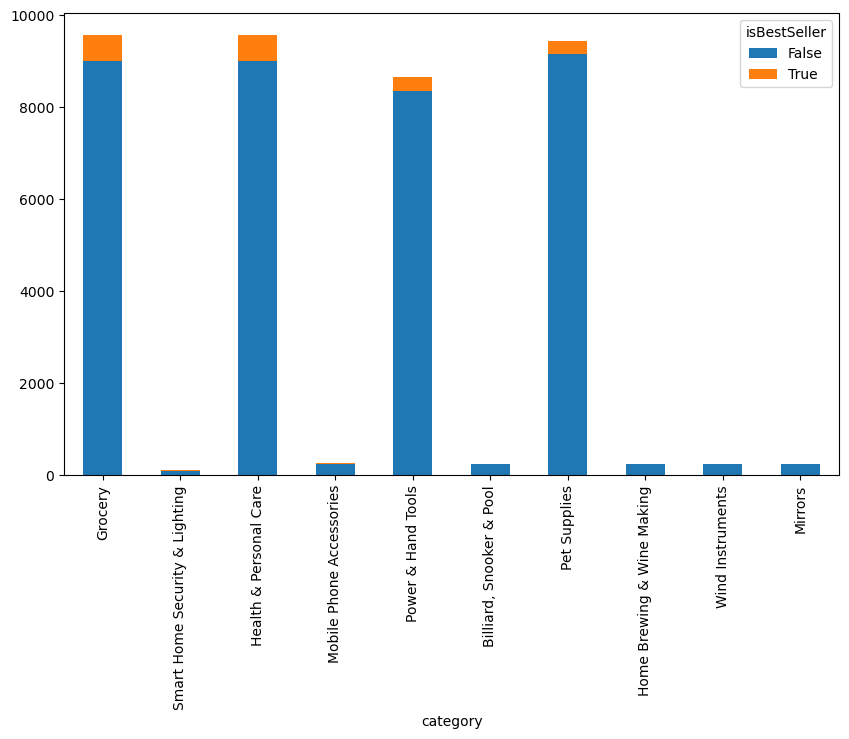

In [41]:
#3. Visualizations

top_10_crosstab = crosstab_result.head(10)

columns_to_drop = ['Proportion Best Seller', 'Total'] #Only keep the count columns for best-sellers and non-best-sellers 
top_10_crosstab = top_10_crosstab.drop(columns=[col for col in columns_to_drop if col in top_10_crosstab.columns]) #Dropping 'Proportion Best Seller' and 'Total' only if they exist

top_10_crosstab.plot(kind="bar", stacked=True, figsize=(10,6))

In [42]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#0. Remove outliers in product prices

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_7564/942045753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")


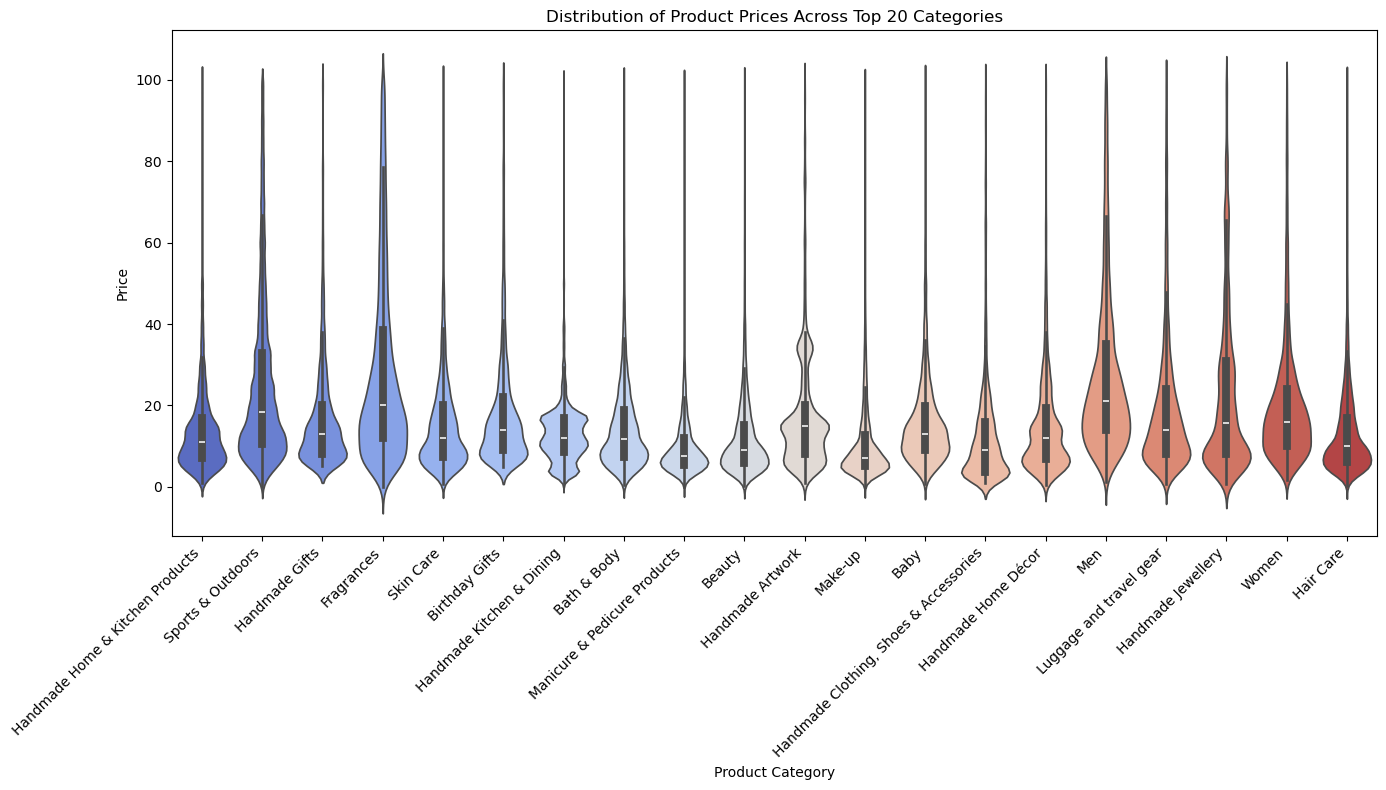

In [43]:
#1. Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. 
#Filter out the top 20 categories based on count for better visualization.

top_20_categories = df_filtered['category'].value_counts().head(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")
#to make it look nicer: 
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.ylabel('Price')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [44]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

median_prices = df_filtered.groupby("category")["price"].median().reset_index()
median_prices = median_prices.sort_values(by="price", ascending=False)
median_prices

#The category with the highest median price is "Desktop PCs" with a median price of 74.00

,category,price
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_7564/350797970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_avg_price, x='category', y='average_price', palette="coolwarm")


<Axes: title={'center': 'Average Price of Products in Top 10 Categories'}, xlabel='Product Category', ylabel='Average Price ($)'>

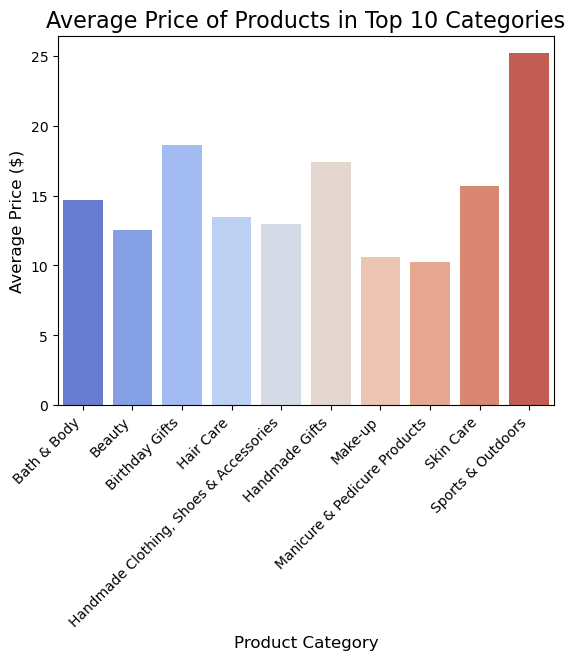

In [45]:
#2. Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

top_10_categories = df_filtered['category'].value_counts().head(10).index
df_top_10 = df_filtered[df_filtered['category'].isin(top_10_categories)]
df_top_10_avg_price = df_top_10.groupby("category")["price"].mean().reset_index()
df_top_10_avg_price.columns = ["category", "average_price"]

plt.title('Average Price of Products in Top 10 Categories', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')

sns.barplot(data=df_top_10_avg_price, x='category', y='average_price', palette="coolwarm")

In [46]:
#Which product category commands the highest average price? Don't filter here by top categories.

average_prices = df_filtered.groupby("category")["price"].mean().reset_index()
average_prices = average_prices.sort_values(by="price", ascending=False)
average_prices

#The profuct category with the highest average price is Motherboards.

,category,price
190,Motherboards,68.772432
34,Boxing Shoes,67.417803
75,Desktop PCs,66.915562
274,Tablets,66.552971
108,Graphics Cards,65.103509
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.210513
8,Arts & Crafts,8.006540


/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_7564/3547386447.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10_rating, x='category', y='stars', palette="coolwarm")


<Axes: xlabel='category', ylabel='stars'>

<Figure size 1200x600 with 0 Axes>

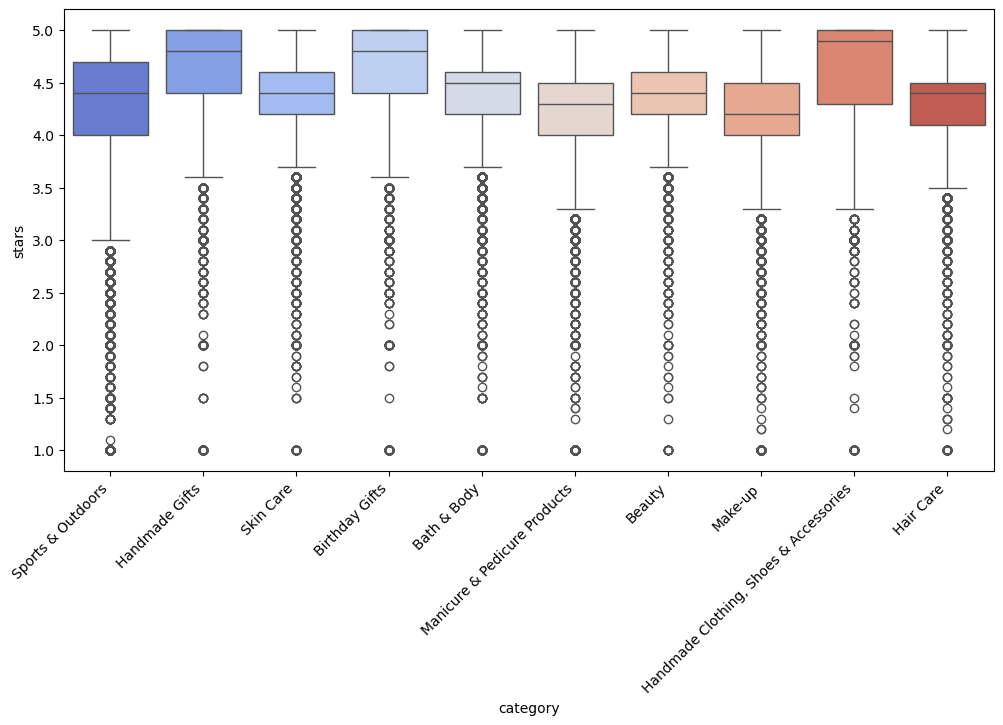

In [47]:
#3. Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.

df_top_10 #dataframe already filtered for top10 categories 
df_top10_rating = df_top_10[df_top_10['stars'] != 0.0] #taking out the 0.0 ratings, because those mean that people didn't leave rating.

plt.figure(figsize=(12, 6))

df_top_10_mean_rating = df_top10_rating.groupby("category")["stars"].median().reset_index()

plt.figure(figsize=(12, 6)) 
plt.xticks(rotation=45, ha='right')

sns.boxplot(data=df_top10_rating, x='category', y='stars', palette="coolwarm")

In [48]:
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
df_filtered_0 = df_filtered[df_filtered['stars'] != 0.0] #taking out the 0.0 ratings, because those mean that people didn't leave rating.
df_filtered_0.groupby("category")["stars"].median().reset_index().sort_values(by="stars", ascending=False)

#The category with the highest median rating is "Made in Italy Handmade".

,category,stars
175,Made in Italy Handmade,5.0
115,Handmade Baby Products,5.0
114,Handmade Artwork,5.0
121,Handmade Kitchen & Dining,4.9
116,"Handmade Clothing, Shoes & Accessories",4.9
...,...,...
187,Mobile Phones & Smartphones,3.9
180,Media Streaming Devices,3.8
3,Action Cameras,3.8
42,Camcorders,3.8


In [49]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings

#1. Correlation Coefficients: Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

correlation_p = df_filtered_0['price'].corr(df_filtered_0['stars'], method = "pearson")
correlation_s= df_filtered_0['price'].corr(df_filtered_0['stars'], method='spearman')

print(f"Pearson correlation: {correlation_p}")
print(f"Spearman correlation: {correlation_s}")

#Whether you look at the linear correlation (Pearson) or the rank-order correlation (Spearman), 
#the data suggests that price does not strongly influence how customers rate products.
#With the numbers so close to cero, we can imply that the price and product ratings variables are independent of each other.

Pearson correlation: 0.006744508067157907
Spearman correlation: 0.024659617205380468


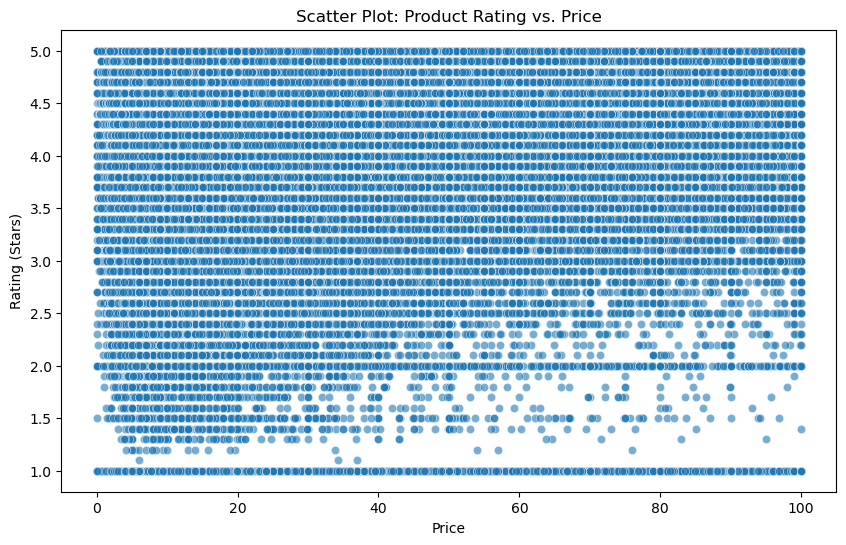

In [50]:
#2. Visualizations:

#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_0, x='price', y='stars', alpha=0.6)

plt.title('Scatter Plot: Product Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')

plt.show

#There's not a stron correlation nor a clear trend between the price and rating variables.

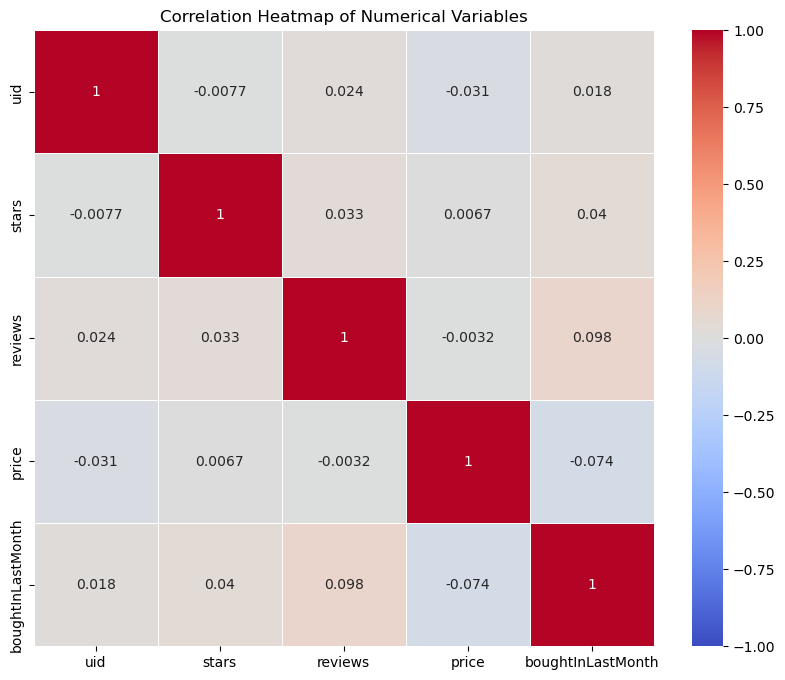

In [65]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

numeric_df = df_filtered_0.select_dtypes(include='number') # Filtering the dataframe to include only numeric columns
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

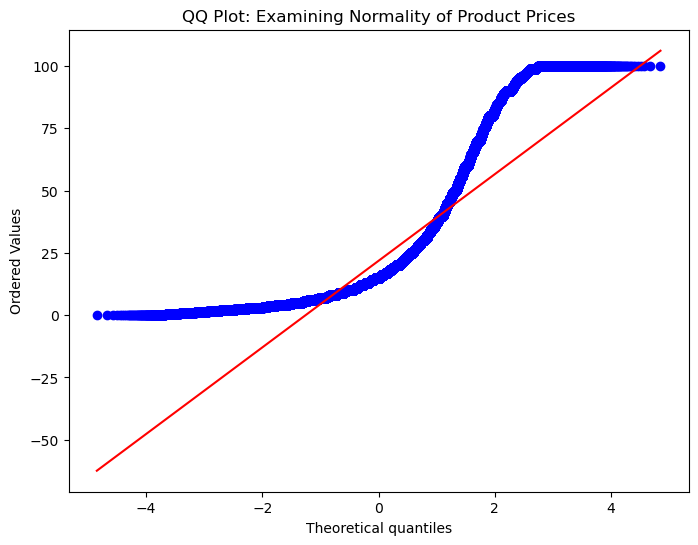

In [56]:
#Examine if product prices typically follow a normal distribution using a QQ plot.

plt.figure(figsize=(8, 6))
stats.probplot(df_filtered_0['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Examining Normality of Product Prices')
plt.show()

#Product prices do not follow a normal distribution. The data suggest that there are more low prices and more high prices than expected in a normal distribution.
#Porbably the price data is skewed and has outliers.